How to set up TensorFlow GPU on Windows 10: <br>
https://medium.com/@soumyadipmajumder/complete-guide-to-tensorflow-gpu-installation-on-windows-10-36e5858640e9

In [1]:
import os
import shutil
import sys

from PIL import Image
sys.modules['Image'] = Image # solve PIL error from official notebook

import matplotlib.pyplot as plt

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Using TensorFlow backend.


https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb

**Data preparation**

In [2]:
# # Main directories in Ubuntu
# original_train_dataset_dir = '/home/grigoriy/Desktop/dogs-vs-cats/train'
# original_test_dataset_dir = '/home/grigoriy/Desktop/dogs-vs-cats/test'
# base_dir = '/home/grigoriy/Desktop/dogs-vs-cats_small/'
# os.mkdir(base_dir)

In [3]:
# # Main directories in Windows (work)
# original_train_dataset_dir = r'C:\Users\g.gusarov\Desktop\Datasets\dogs-vs-cats\train'
# original_test_dataset_dir = r'C:\Users\g.gusarov\Desktop\Datasets\dogs-vs-cats\test'
# base_dir = r'C:\Users\g.gusarov\Desktop\Datasets\dogs-vs-cats_small'
# os.makedirs(base_dir)

In [4]:
# Main directories in Windows (Home)
original_train_dataset_dir = r'H:\Datasets\dogs-vs-cats\train'
original_test_dataset_dir = r'H:\Datasets\dogs-vs-cats\test'
base_dir = r'H:\Datasets\dogs-vs-cats_small'
os.makedirs(base_dir)

In [5]:
# train/test/validation directories for cats/dogs
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [6]:
# In our cas we generate train/validation/test datasets from original train data only
# train_datasets - 1000
fnames_cat_train = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames_cat_train:
    src = os.path.join(original_train_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames_dog_train = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames_dog_train:
    src = os.path.join(original_train_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst) 
    
# validation_dataset - next 500
fnames_cat_train = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames_cat_train:
    src = os.path.join(original_train_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames_dog_train = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames_dog_train:
    src = os.path.join(original_train_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst) 

# test_dataset - next 500
fnames_cat_train = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames_cat_train:
    src = os.path.join(original_train_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames_dog_train = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames_dog_train:
    src = os.path.join(original_train_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst) 

In [7]:
# Sanity check
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


**Simple convolutional network**

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', 
                        input_shape = (150, 150, 3))) #150x150 we get manually in next step
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
# Data preparation. Convert image to ready-to-go batches of tensors
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
# more about fit_generator: https://keras.io/models/sequential/
# PIL error: https://stackoverflow.com/questions/48225729/importerrorcould-not-import-pil-image-working-with-keras-ternsorflow/50775336
history = model.fit_generator(
    generator = train_generator,
    steps_per_epoch = 100, # 20 batches * 100 steps per epochs = 2000 images (full train dataset)
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50)


Epoch 1/30
100/100 [==============================] - 28s 281ms/step - loss: 0.6857 - acc: 0.5510 - val_loss: 0.6783 - val_acc: 0.5690
Epoch 2/30
100/100 [==============================] - 17s 166ms/step - loss: 0.6593 - acc: 0.6090 - val_loss: 0.6618 - val_acc: 0.5890
Epoch 3/30
100/100 [==============================] - 17s 166ms/step - loss: 0.6173 - acc: 0.6575 - val_loss: 0.6178 - val_acc: 0.6550
Epoch 4/30
100/100 [==============================] - 17s 175ms/step - loss: 0.5705 - acc: 0.7125 - val_loss: 0.6275 - val_acc: 0.6490
Epoch 5/30
100/100 [==============================] - 17s 175ms/step - loss: 0.5325 - acc: 0.7310 - val_loss: 0.6237 - val_acc: 0.6500
Epoch 6/30
100/100 [==============================] - 17s 166ms/step - loss: 0.5072 - acc: 0.7540 - val_loss: 0.5710 - val_acc: 0.7130
Epoch 7/30
100/100 [==============================] - 17s 168ms/step - loss: 0.4742 - acc: 0.7740 - val_loss: 0.5734 - val_acc: 0.6940
Epoch 8/30
100/100 [==============================] - 

In [11]:
model.save('cats_vs_dogs_small_1.h5')

In [12]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

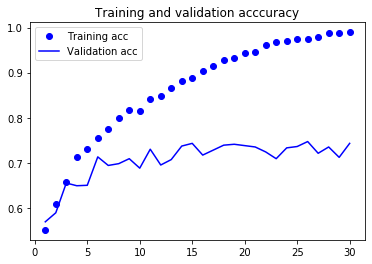

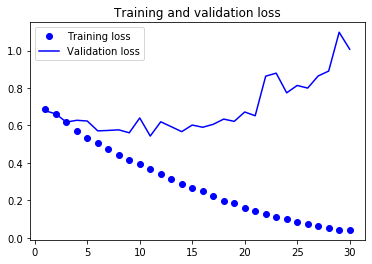

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs  = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acccuracy')
plt.legend()

plt.show()
plt.clf()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Overfit started near 12 epoch, accuracy stacked in 70%.

**Simple convolutional network with data augmentation and dropout before dense layers**

We can try to **use more data** to prevent early overfit. For this purpose we can use **data augmentation**.

Example of ImageGenerator with data augmentation

In [14]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

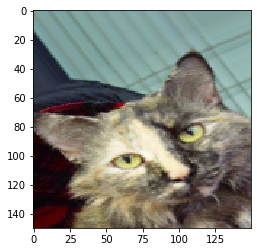

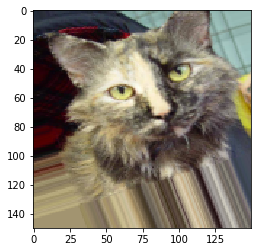

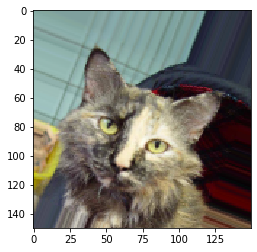

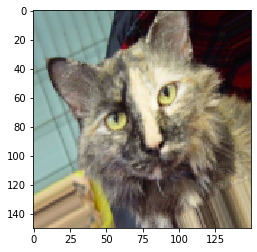

In [15]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[2]

img = image.load_img(img_path, target_size = (150, 150))
x = image.img_to_array(img) #numpy array (150, 150, 3)
x = x.reshape((1,) + x.shape) #numpy array (1, 150, 150, 3)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()
    


Let`s use it in our model

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 27s 273ms/step - loss: 0.6924 - acc: 0.5181 - val_loss: 0.6877 - val_acc: 0.4930
Epoch 2/100
100/100 [==============================] - 25s 249ms/step - loss: 0.6823 - acc: 0.5659 - val_loss: 0.6702 - val_acc: 0.5593
Epoch 3/100
100/100 [==============================] - 25s 247ms/step - loss: 0.6694 - acc: 0.5894 - val_loss: 0.6787 - val_acc: 0.5387
Epoch 4/100
100/100 [==============================] - 25s 247ms/step - loss: 0.6501 - acc: 0.6194 - val_loss: 0.6222 - val_acc: 0.6482
Epoch 5/100
100/100 [==============================] - 25s 247ms/step - loss: 0.6409 - acc: 0.6356 - val_loss: 0.6162 - val_acc: 0.6605
Epoch 6/100
100/100 [==============================] - 24s 243ms/step - loss: 0.6272 - acc: 0.6466 - val_loss: 0.5954 - val_acc: 0.6772
Epoch 7/100
100/100 [==============================] - 46s 458ms/step - loss: 0.6117 - acc: 0.6656 -

In [35]:
model.save('cats_vs_dogs_small_2.h5')

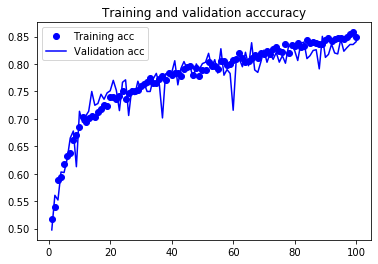

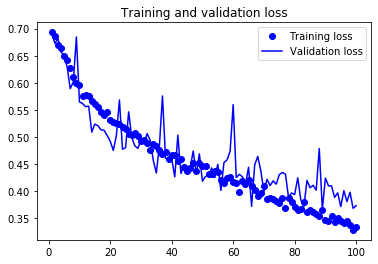

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs  = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acccuracy')
plt.legend()

plt.show()
plt.clf()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()